INFO:root:{'LOG_LEVEL': 'INFO', 'number_of_agents': 10, 'problem': 'Rastrigin', 'problem_size': 90, 'communication_type': 'temp2', 'communication_operator': 'average', 'max_time': 800, 'enable_plots': True, 'trust': 'global', 'population size': 5, 'offspring size': 15}
INFO:root:Socjo started
Progress: 216005it [03:23, 1063.08it/s]                            
INFO:root:Socjo finished in 5.071201133728027
Progress: 216005it [00:18, 11479.38it/s]                            
INFO:root:comparison finished in 4.705675808588664
INFO:root:best socjo 58.96339019010842 best single 27.216720785636504


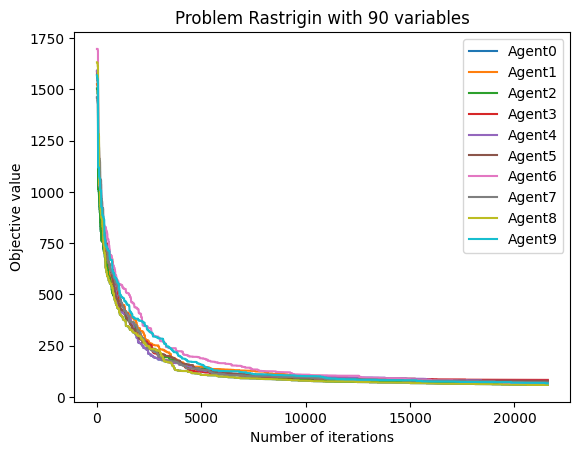

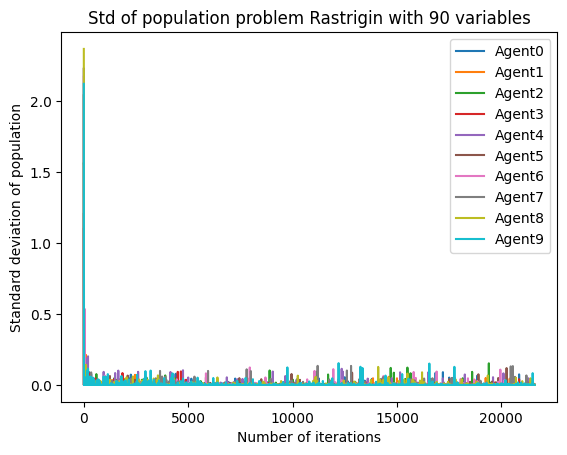

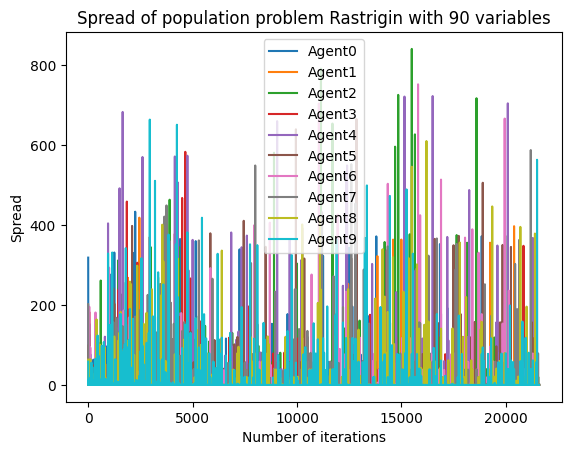

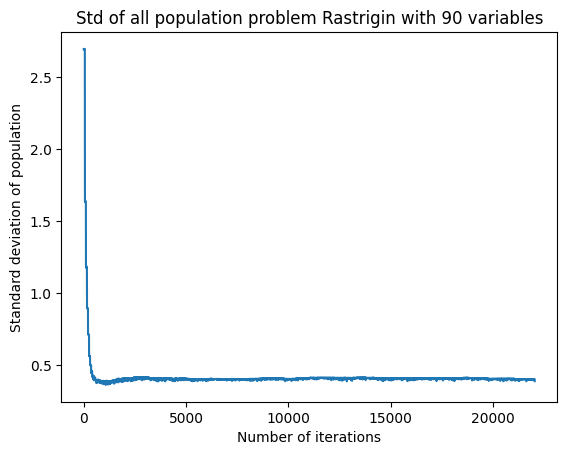

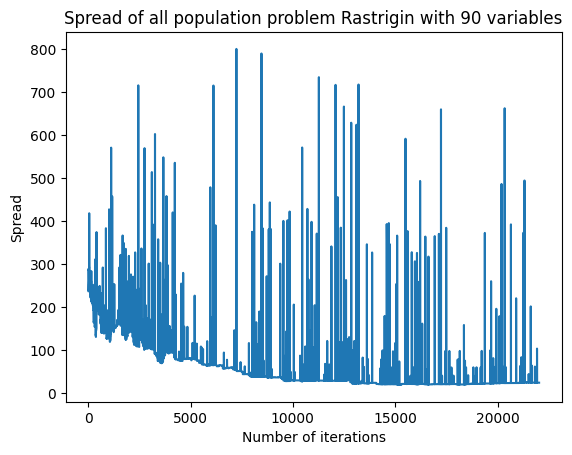

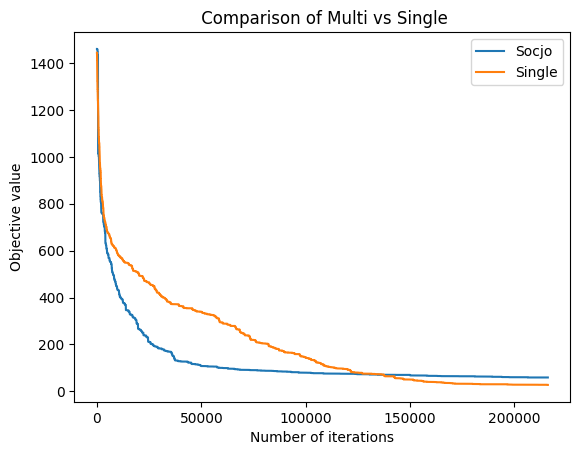

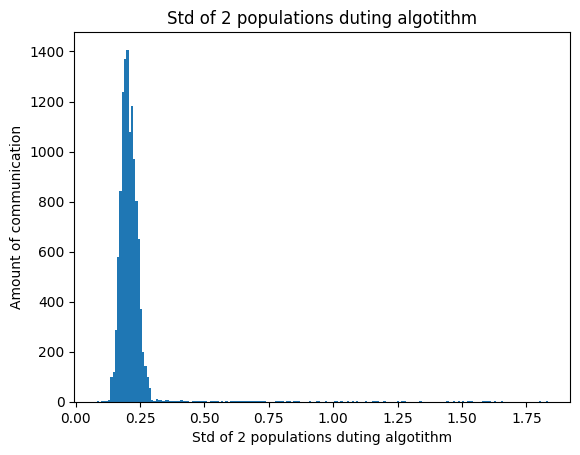

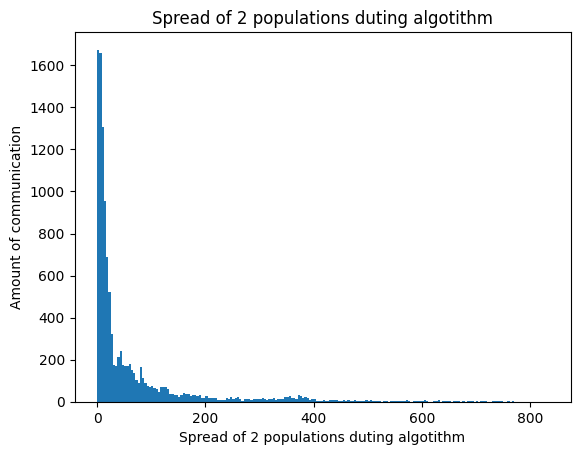

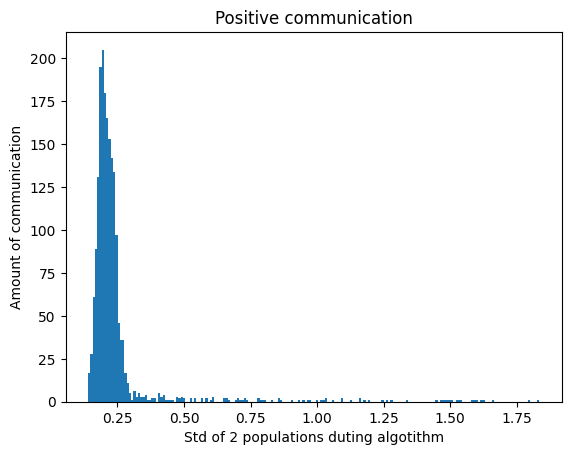

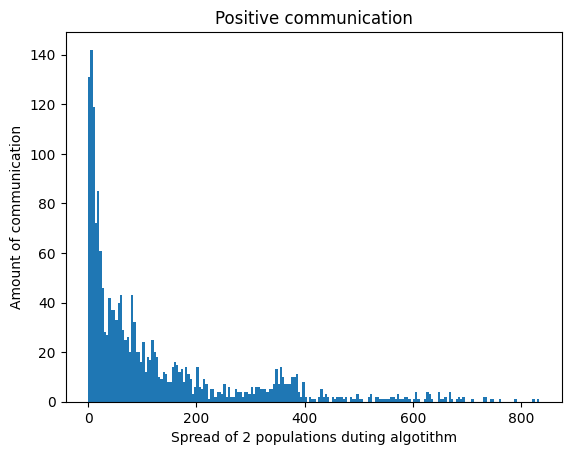

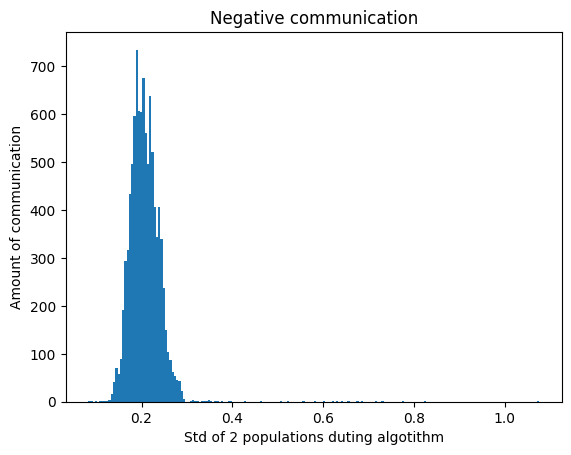

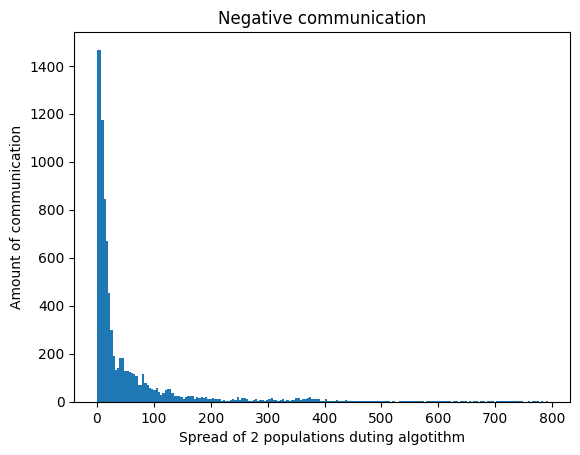

INFO:root:plotting finished in 0.07363710403442383
INFO:root:Run 0 out of 3
INFO:root:Socjo started
INFO:root:Socjo finished in 5.077262008190155
INFO:root:comparison finished in 4.7137453357378645
INFO:root:best socjo 50.15279633238211 best single 24.20080264494534


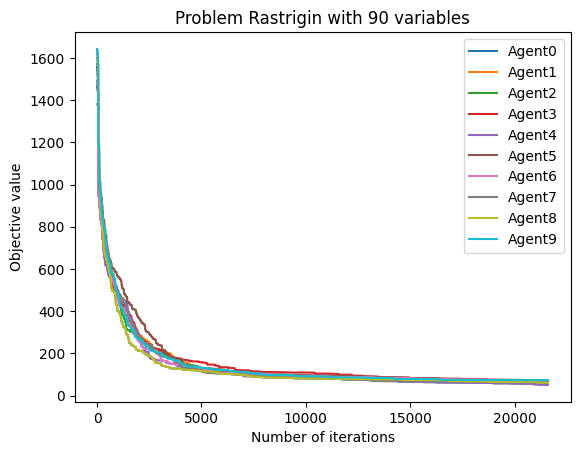

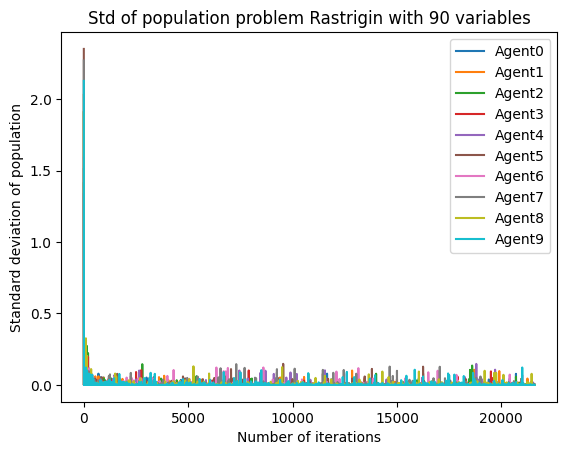

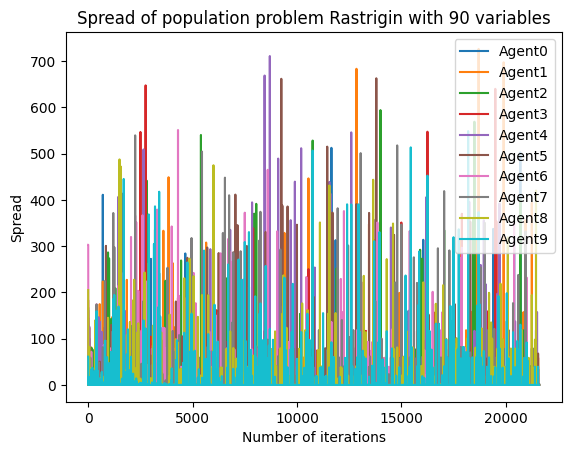

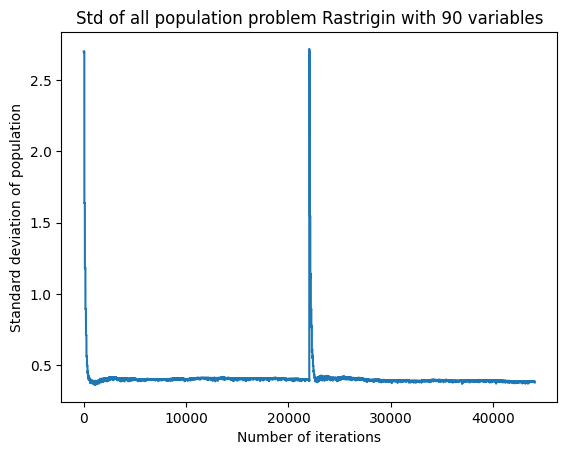

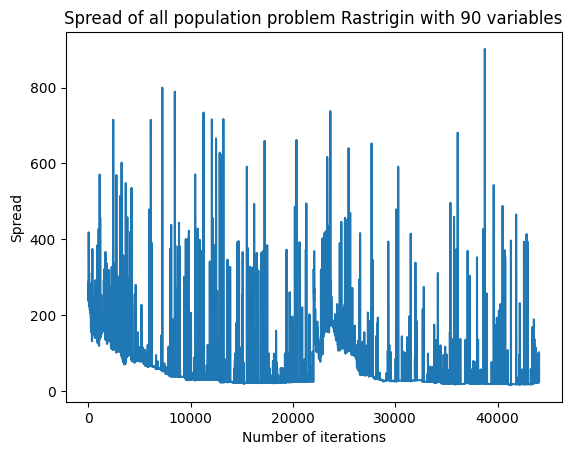

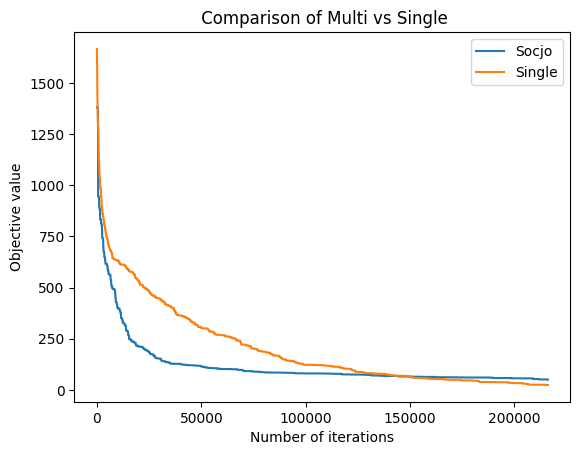

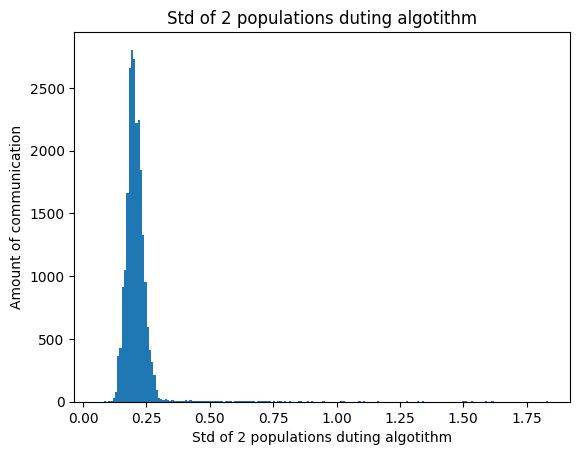

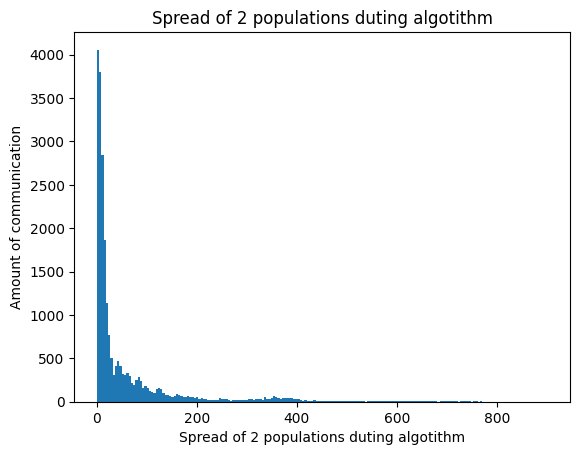

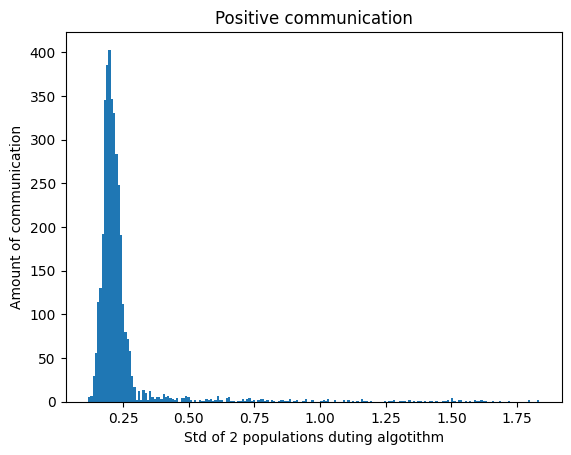

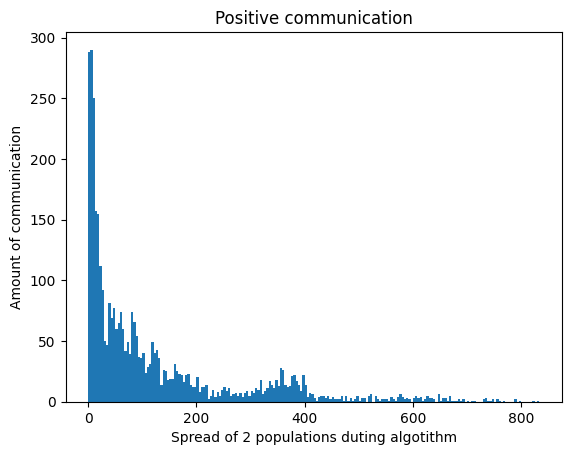

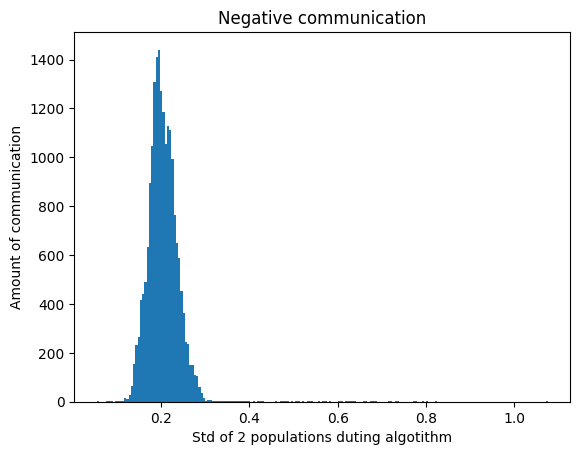

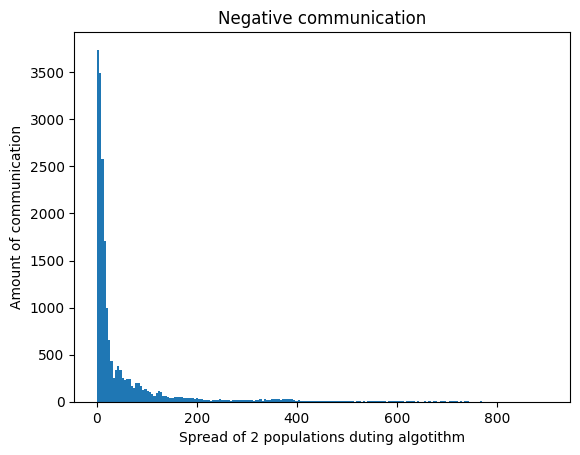

INFO:root:plotting finished in 0.0699632207552592
INFO:root:Run 1 out of 3
INFO:root:Socjo started
INFO:root:Socjo finished in 5.108892563978831
INFO:root:comparison finished in 4.708712657292684
INFO:root:best socjo 63.98956942443296 best single 16.294156098887424


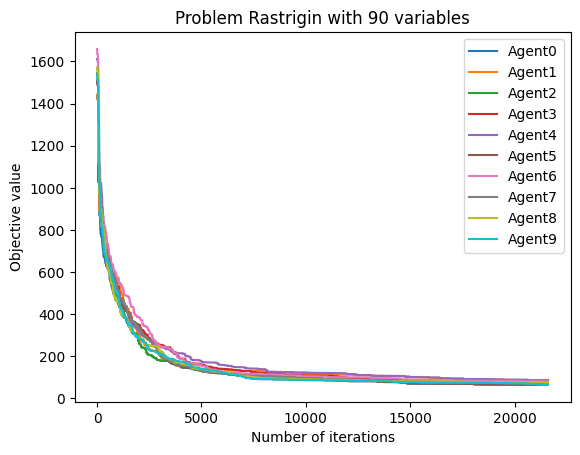

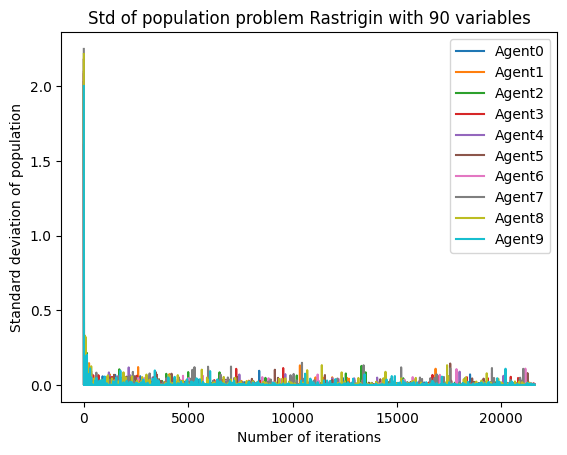

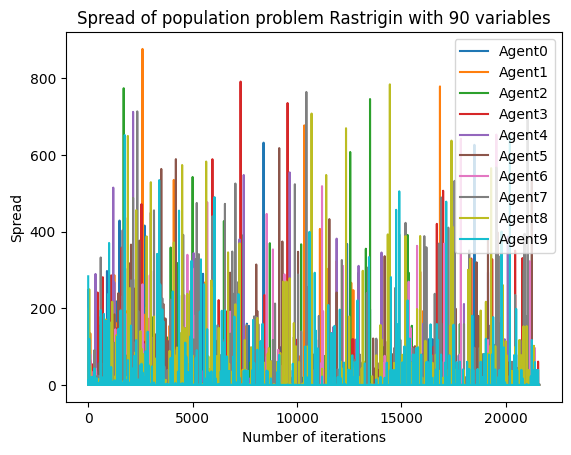

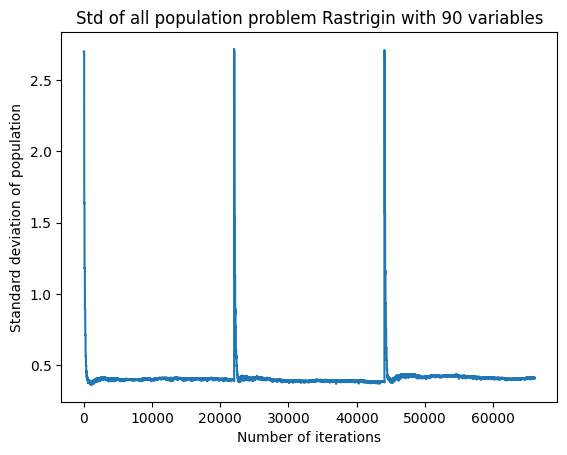

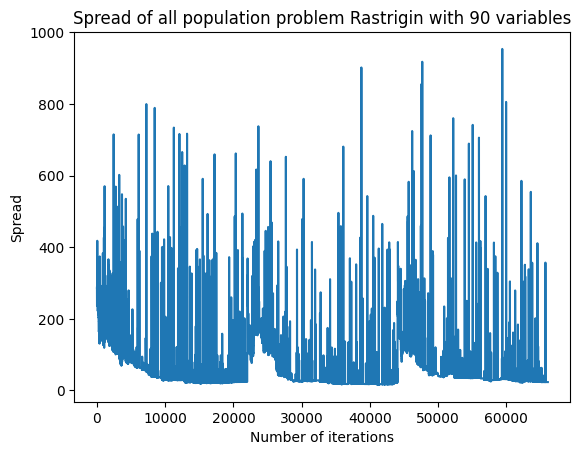

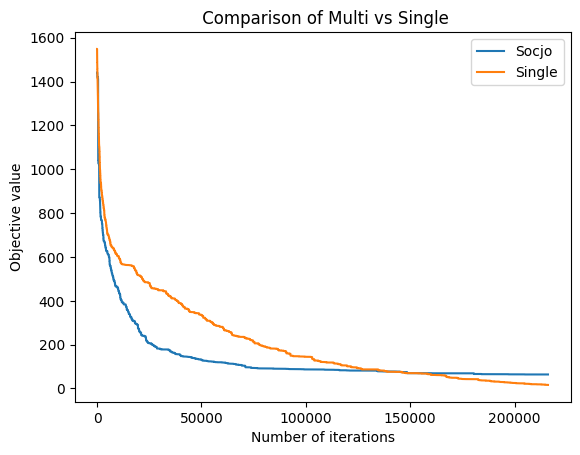

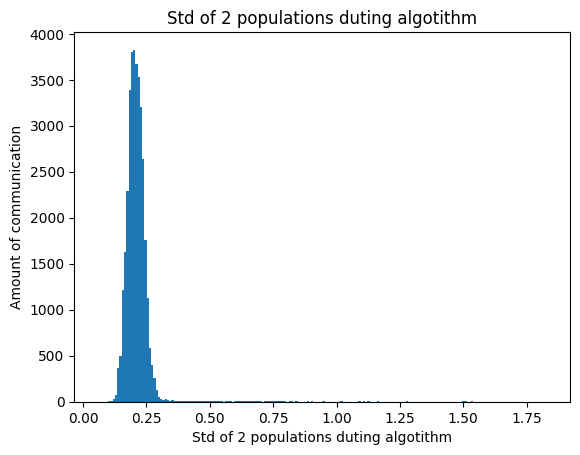

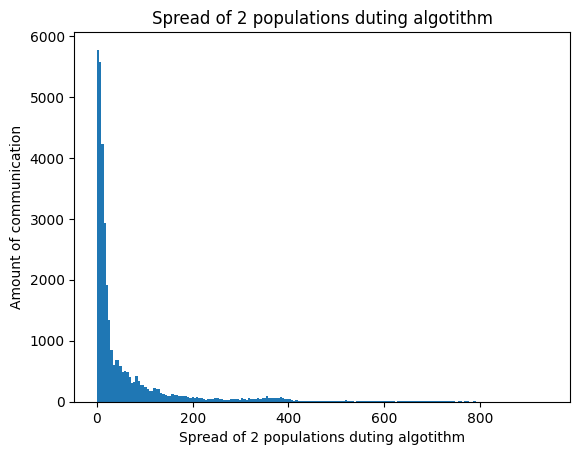

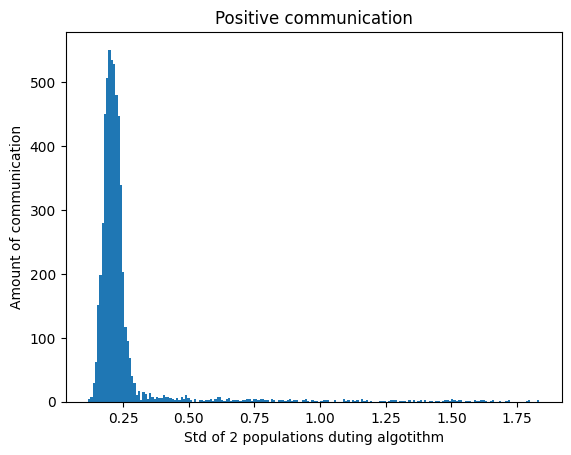

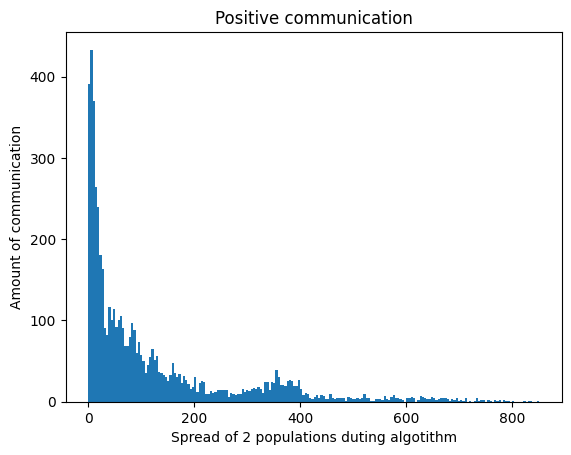

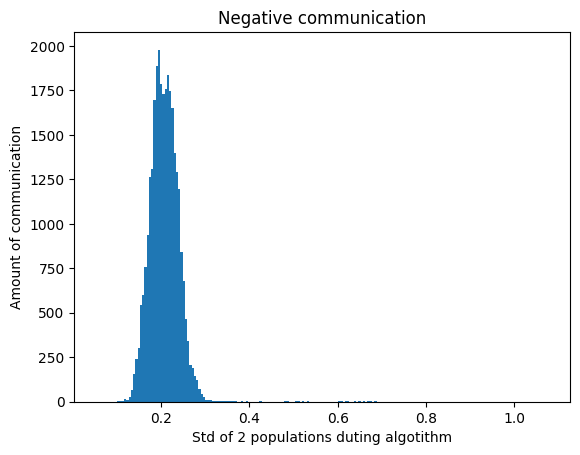

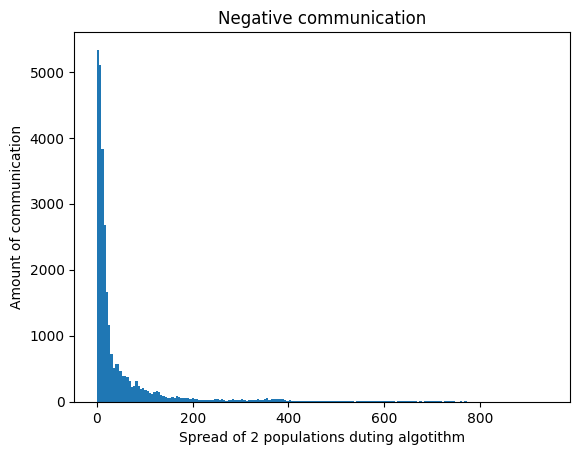

INFO:root:plotting finished in 0.07670507431030274
INFO:root:Run 2 out of 3


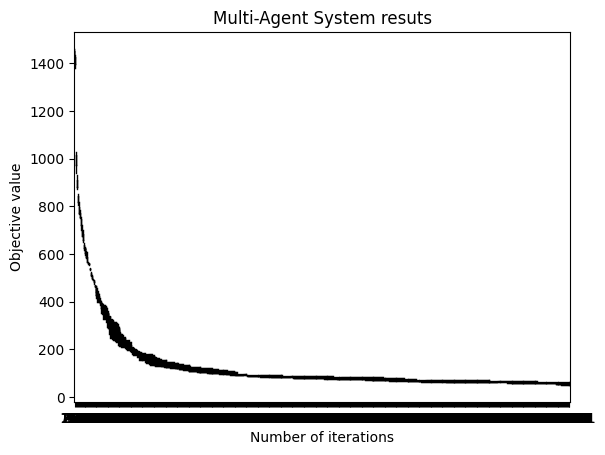

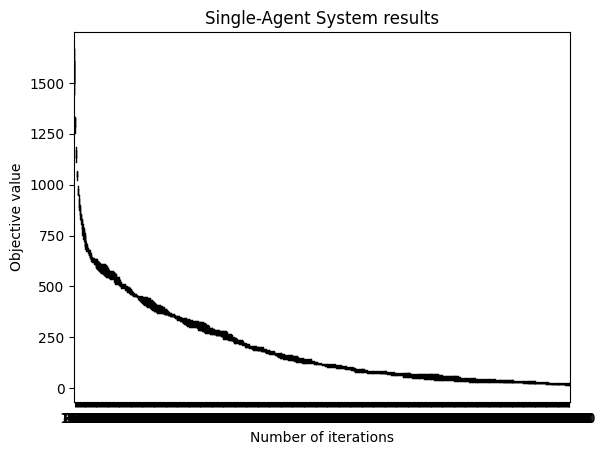

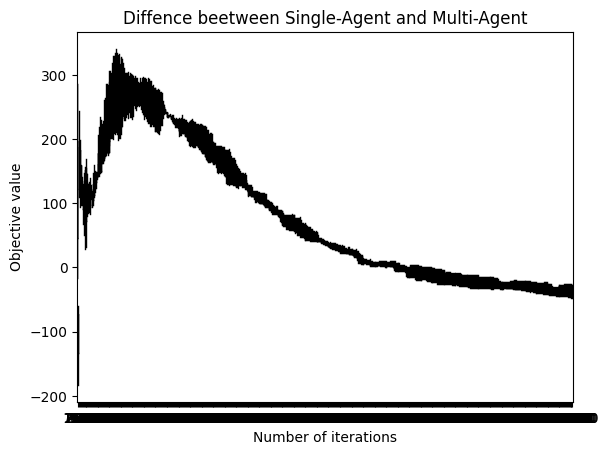

INFO:root:{'LOG_LEVEL': 'INFO', 'number_of_agents': 10, 'problem': 'Griewank', 'problem_size': 90, 'communication_type': 'temp2', 'communication_operator': 'average', 'max_time': 800, 'enable_plots': True, 'trust': 'global', 'population size': 5, 'offspring size': 15}
INFO:root:Socjo started
Progress: 162005it [02:43, 990.29it/s]                             
INFO:root:Socjo finished in 4.0834922909736635
Progress: 162005it [00:15, 10618.01it/s]                            
INFO:root:comparison finished in 3.777768603960673
INFO:root:best socjo 0.10284515886644519 best single 0.021563588136121026


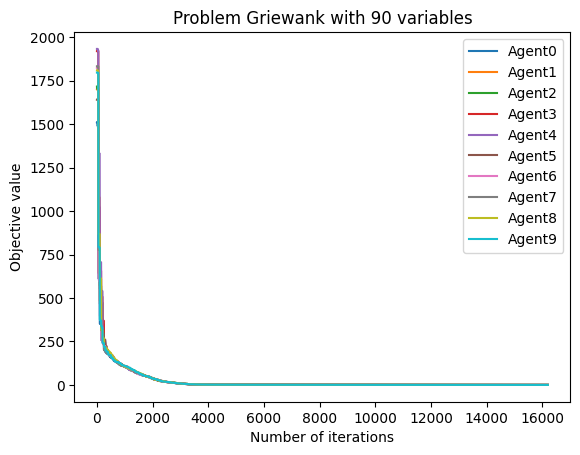

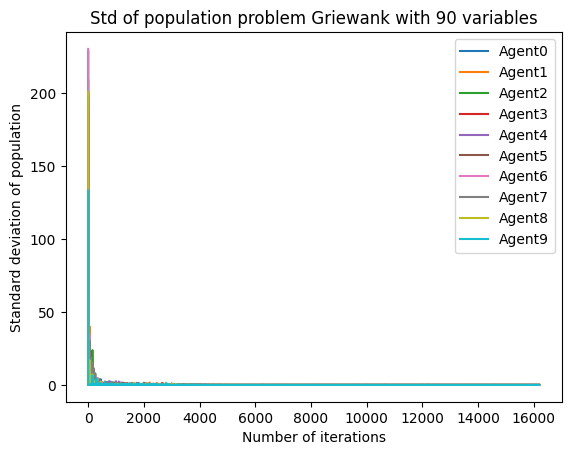

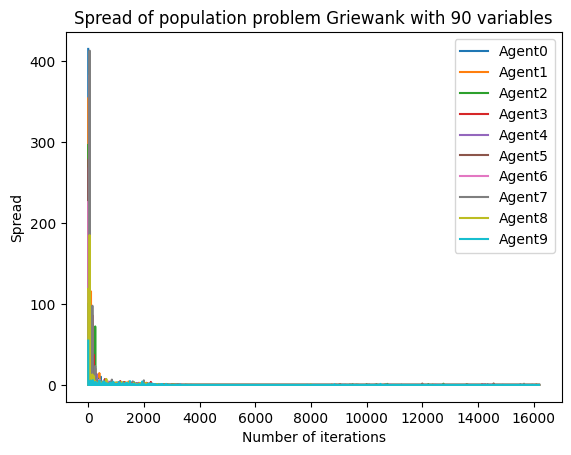

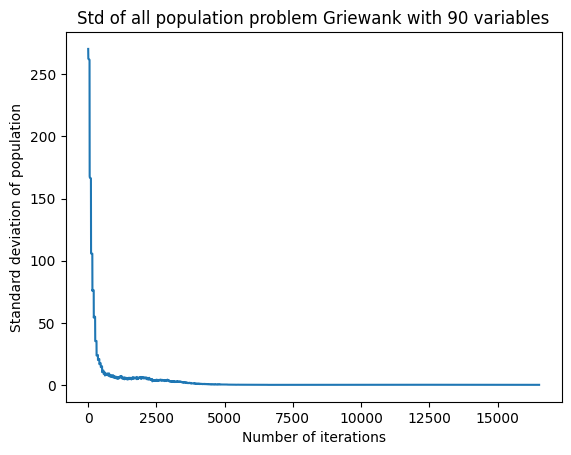

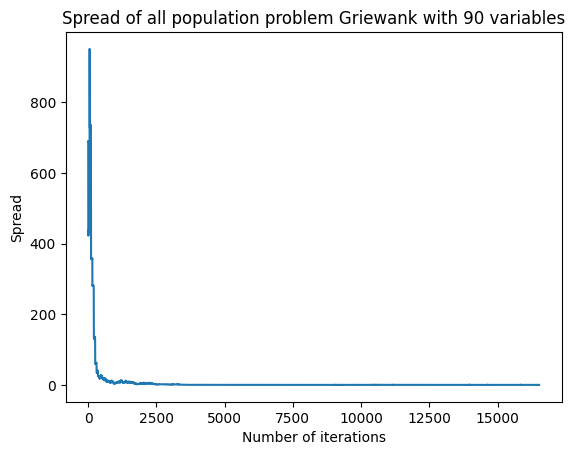

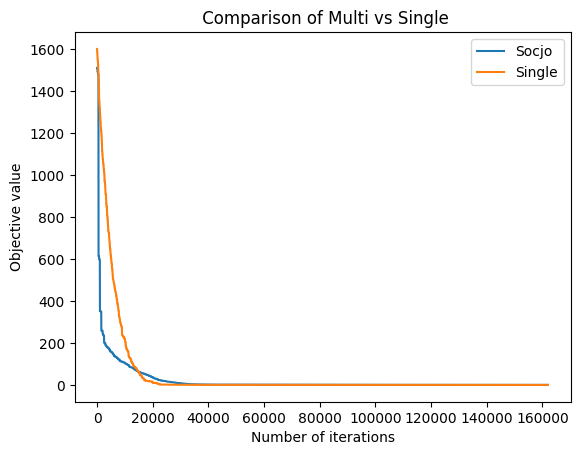

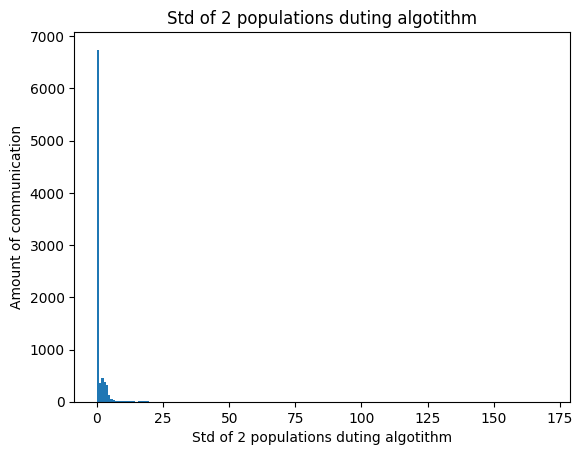

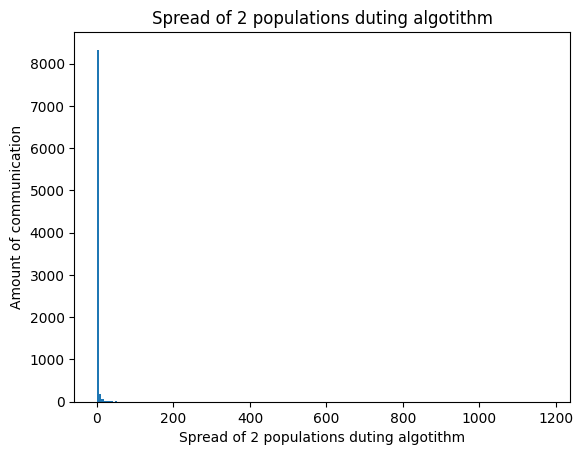

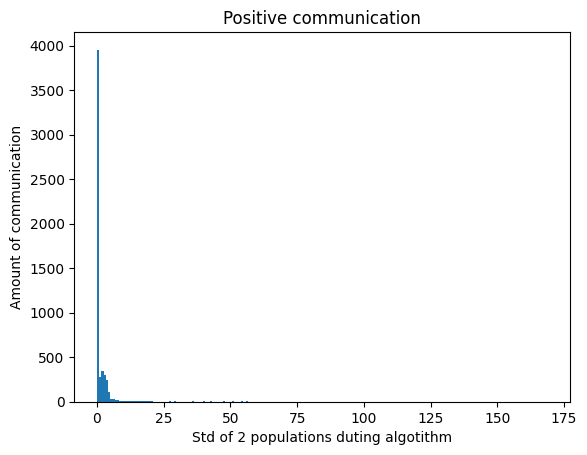

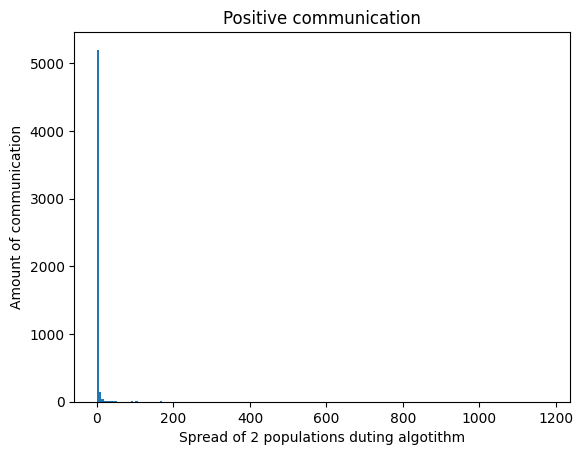

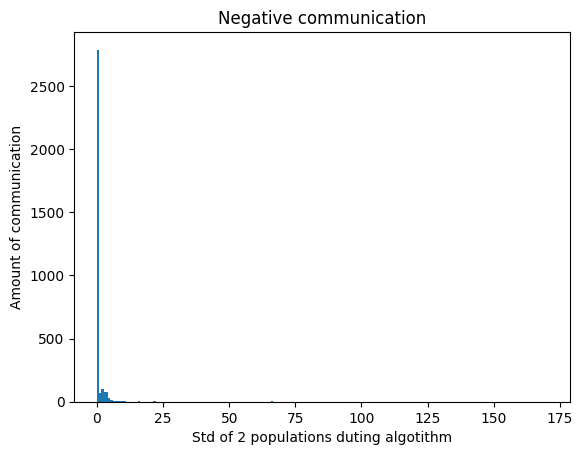

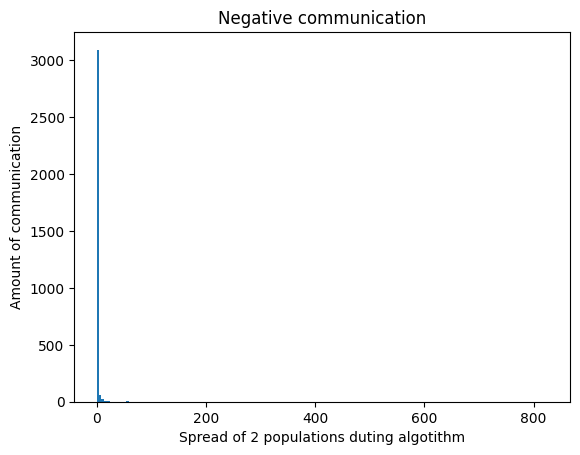

INFO:root:plotting finished in 0.05704691807428996
INFO:root:Run 0 out of 3
INFO:root:Socjo started
INFO:root:Socjo finished in 4.093021543820699
INFO:root:comparison finished in 3.772505255540212
INFO:root:best socjo 0.10258882276655112 best single 0.184084002121781


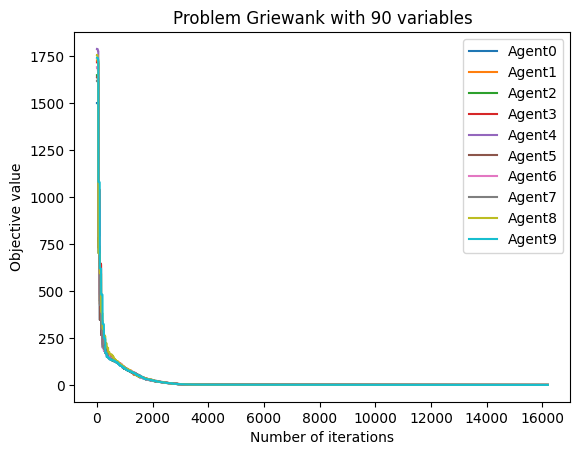

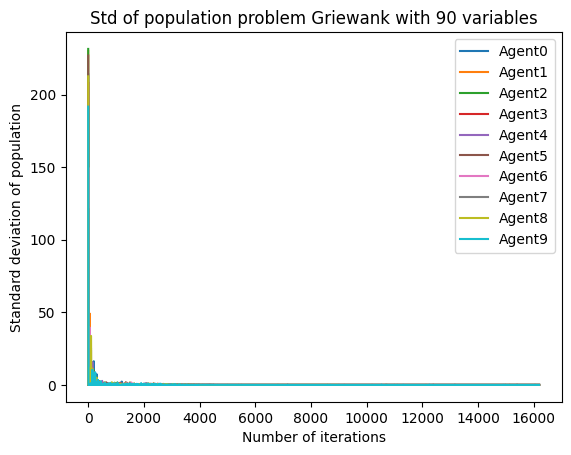

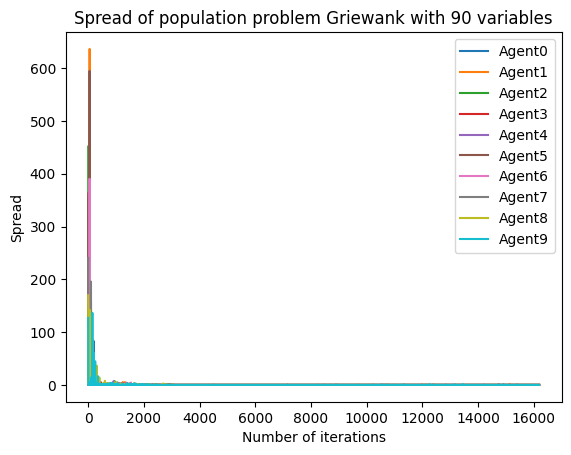

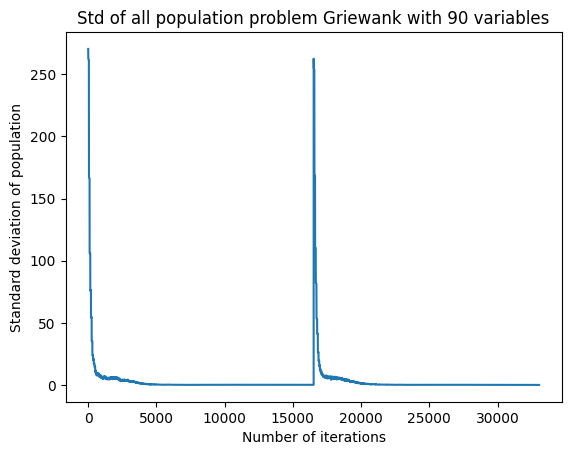

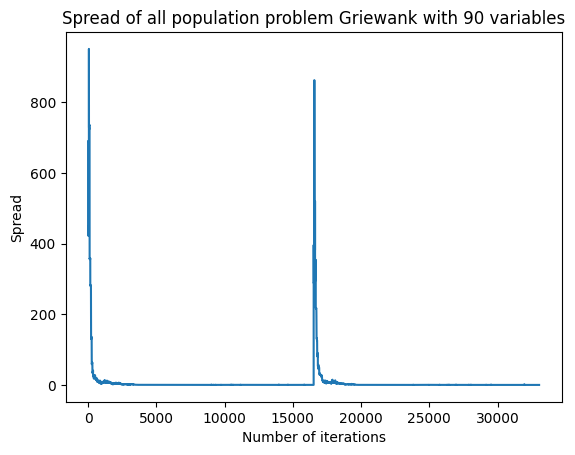

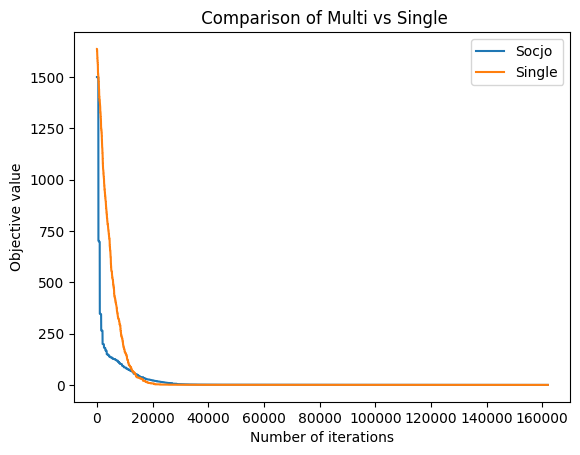

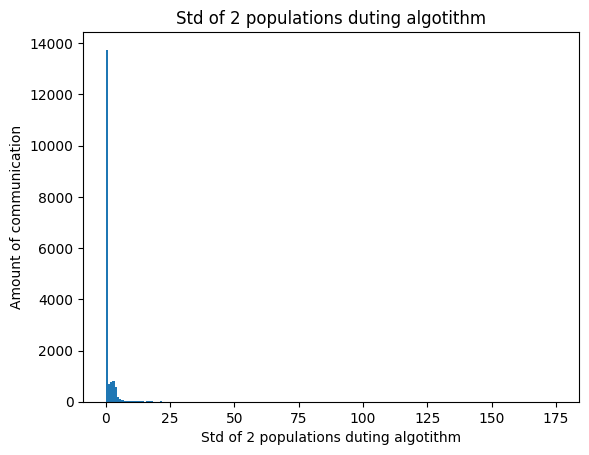

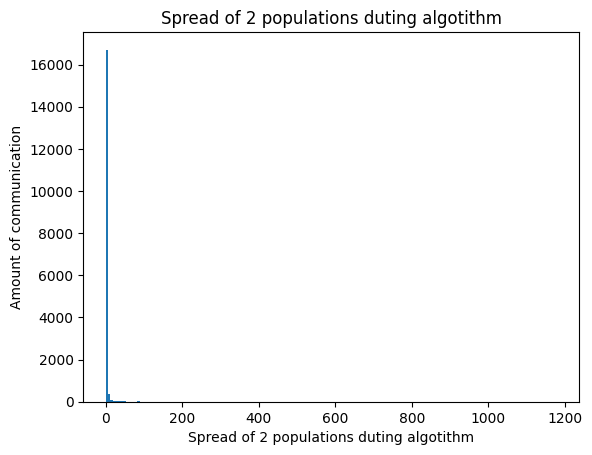

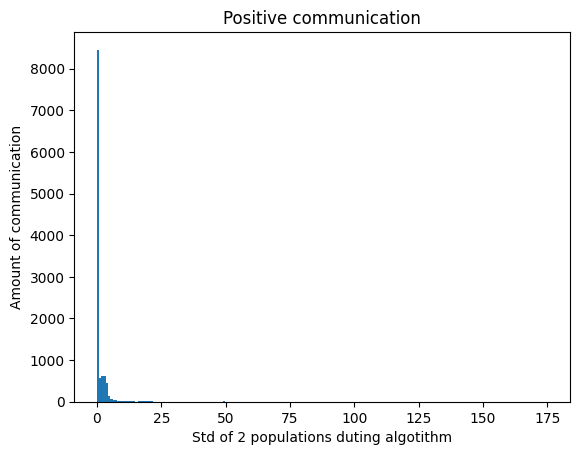

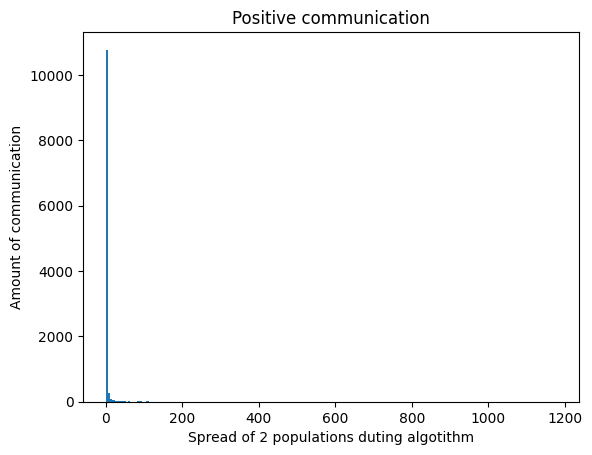

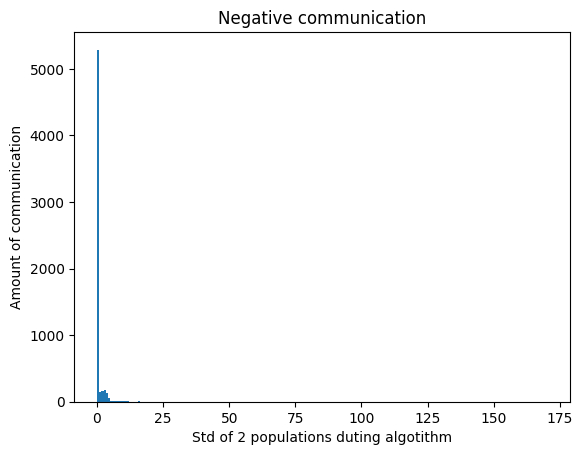

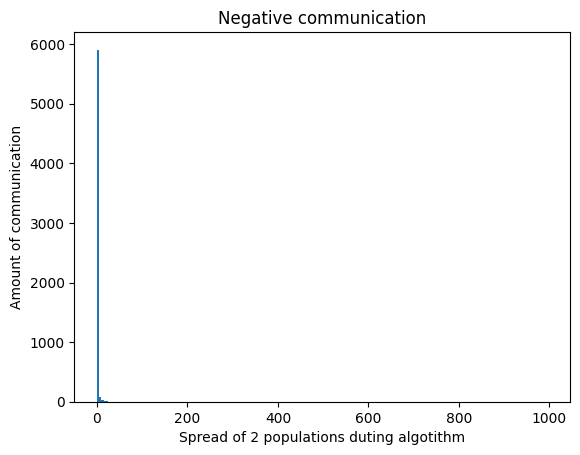

INFO:root:plotting finished in 0.06575478712717692
INFO:root:Run 1 out of 3
INFO:root:Socjo started
INFO:root:Socjo finished in 4.0908887902895605
INFO:root:comparison finished in 3.786982258160909
INFO:root:best socjo 0.08881784913661472 best single 0.057633146635357346


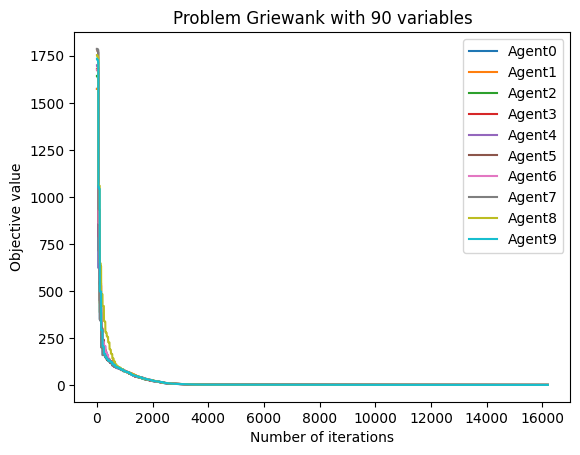

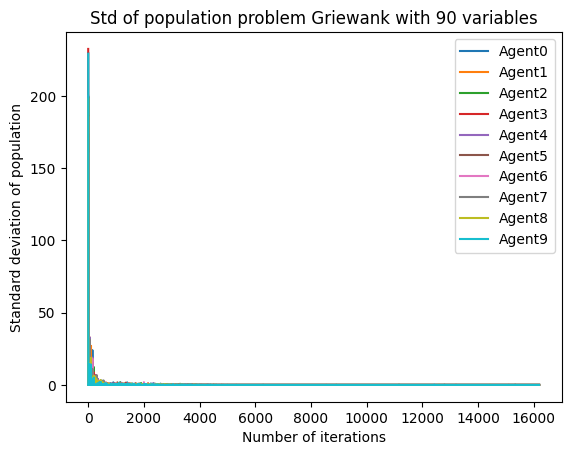

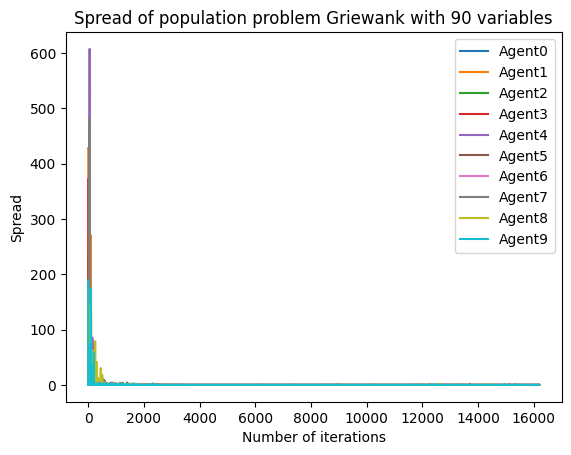

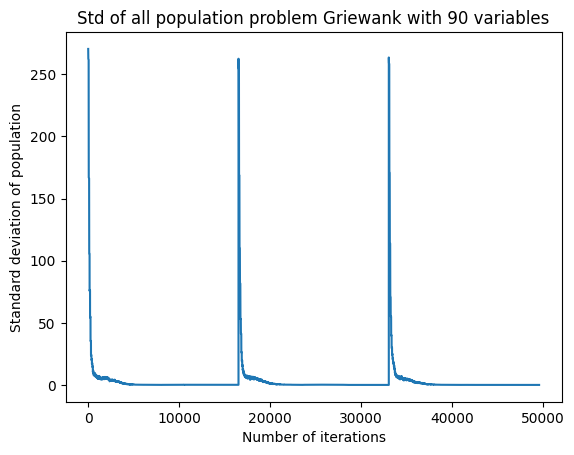

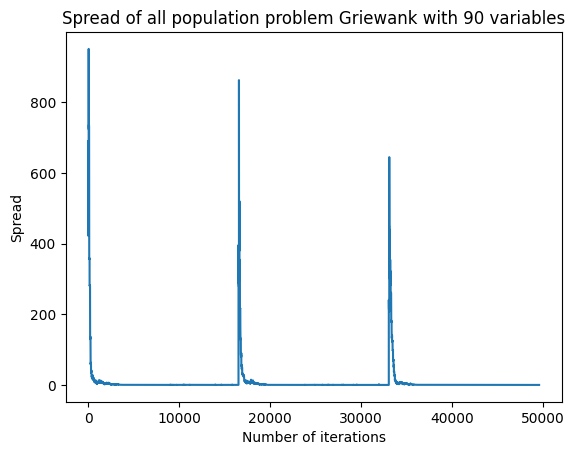

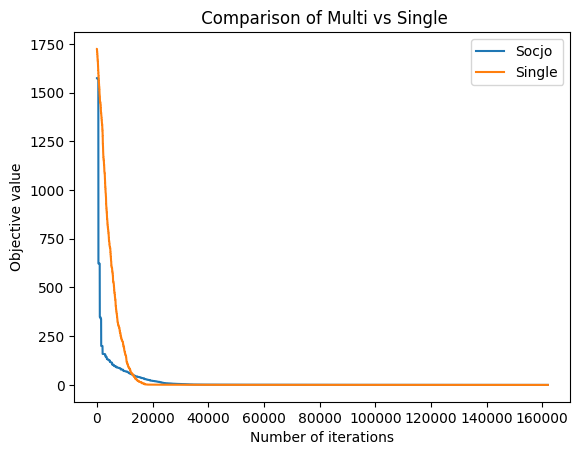

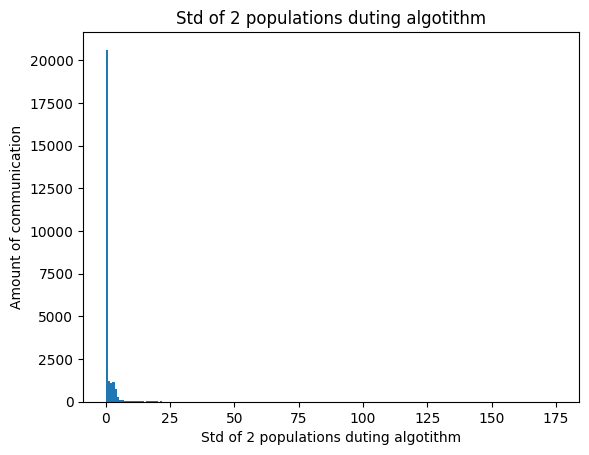

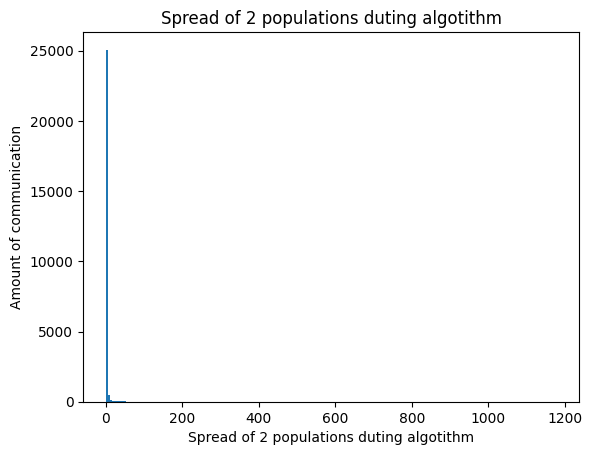

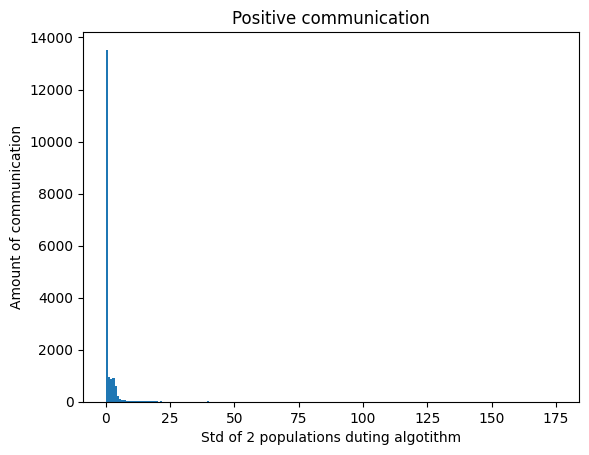

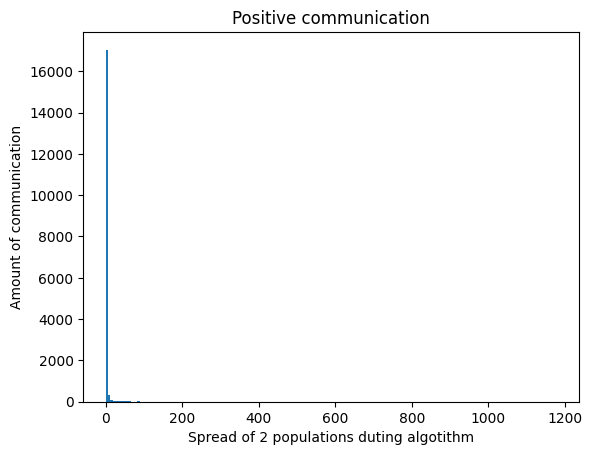

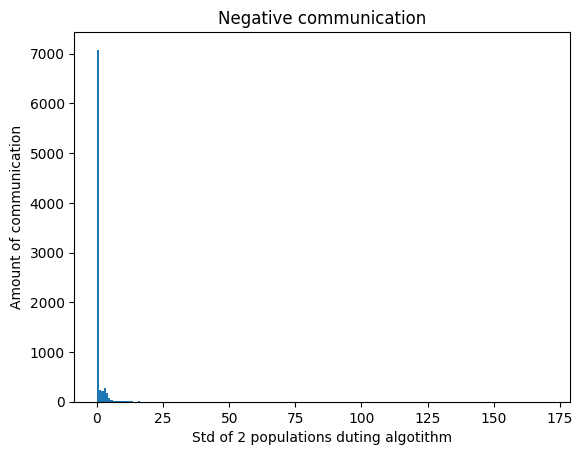

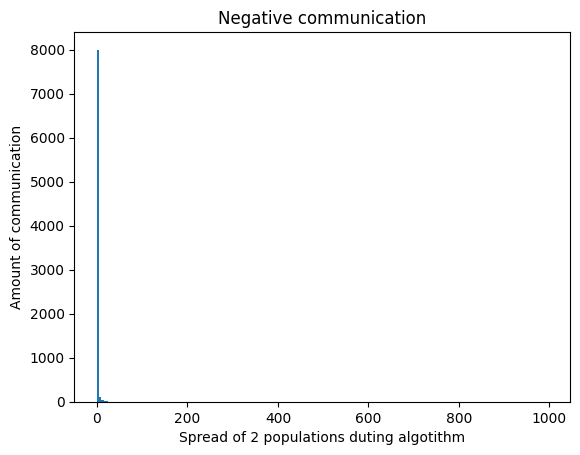

INFO:root:plotting finished in 0.06840959390004477
INFO:root:Run 2 out of 3


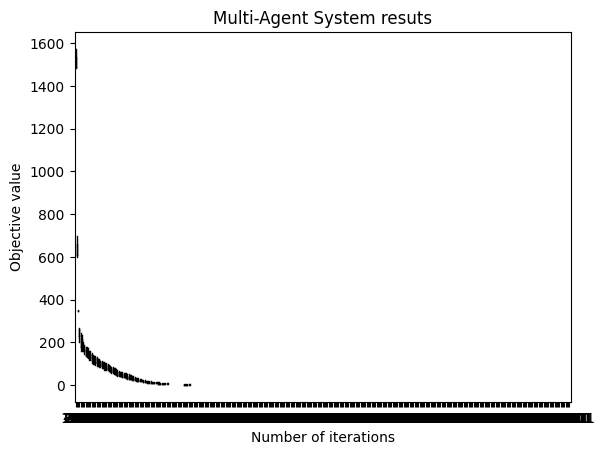

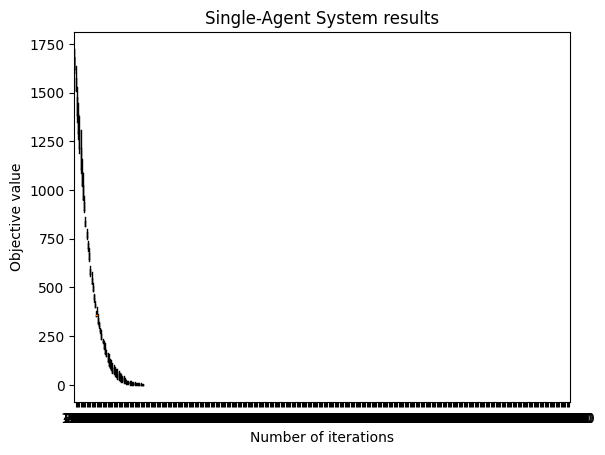

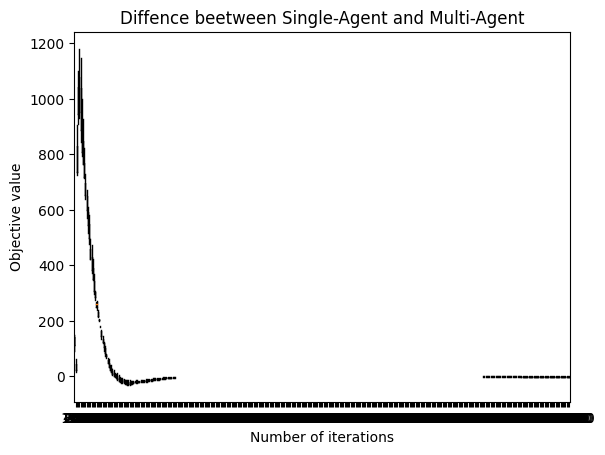

INFO:root:{'LOG_LEVEL': 'INFO', 'number_of_agents': 10, 'problem': 'Ackley', 'problem_size': 90, 'communication_type': 'temp2', 'communication_operator': 'average', 'max_time': 800, 'enable_plots': True, 'trust': 'global', 'population size': 5, 'offspring size': 15}
INFO:root:Socjo started
Progress: 108005it [01:37, 1110.08it/s]                            
INFO:root:Socjo finished in 2.4093594551086426
Progress: 108005it [00:08, 12152.92it/s]                            
INFO:root:comparison finished in 2.2235331336657205
INFO:root:best socjo 0.32982602553096685 best single 0.2956381712626599


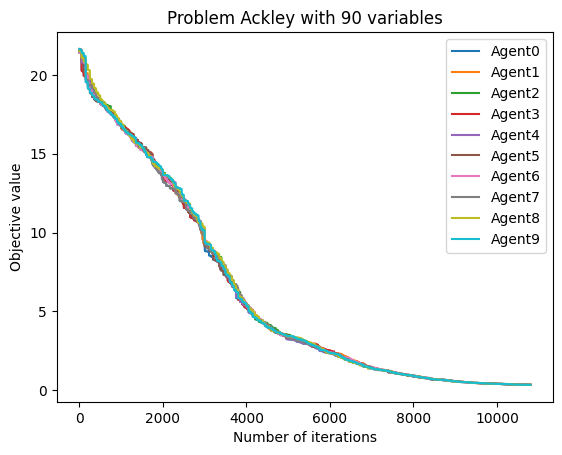

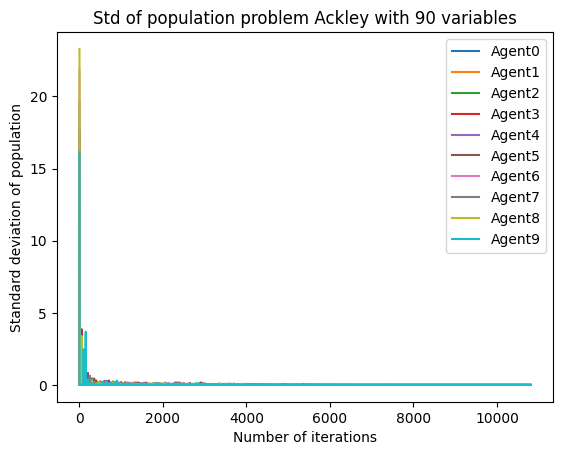

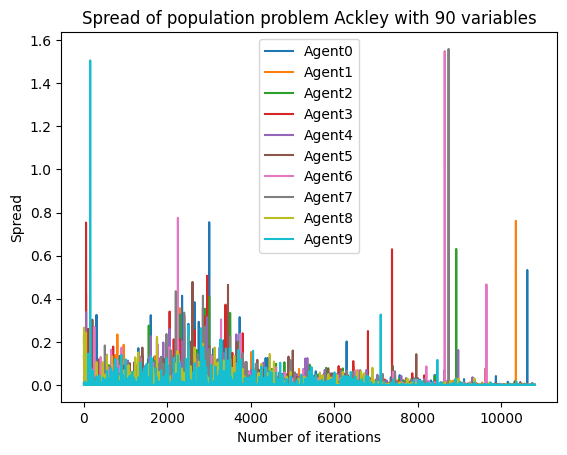

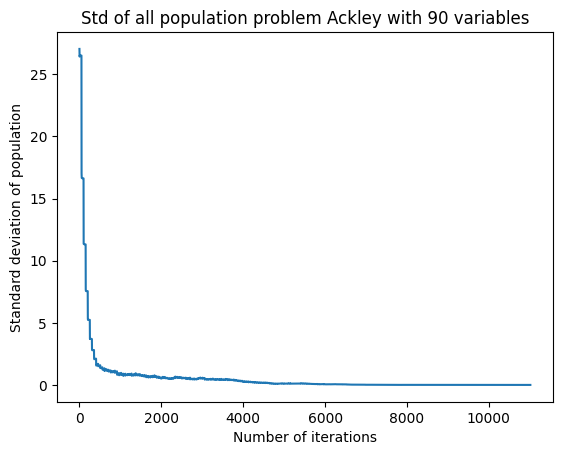

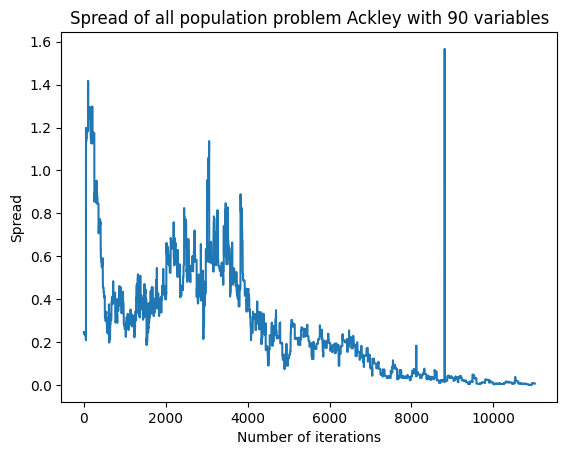

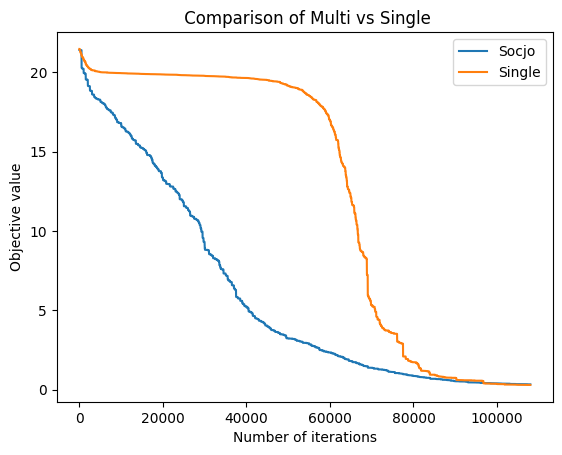

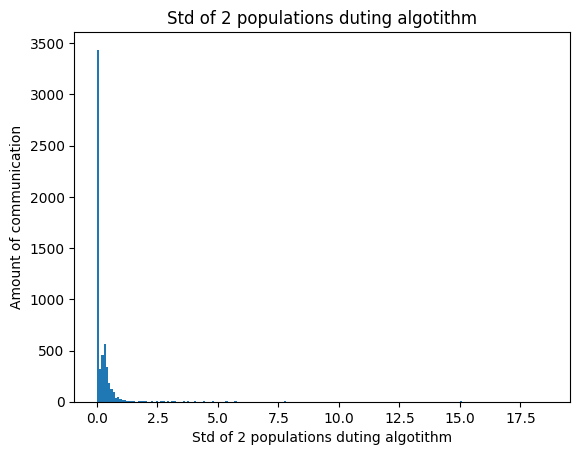

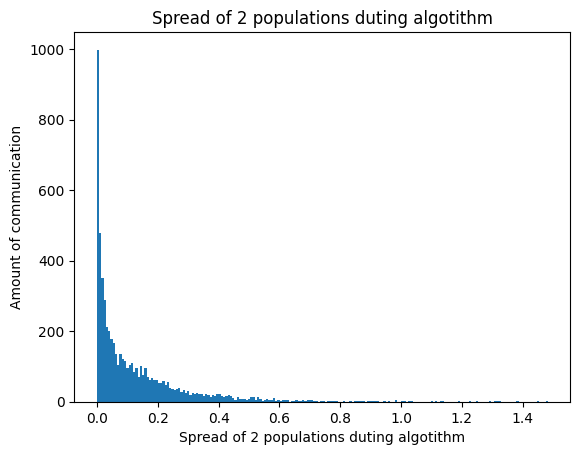

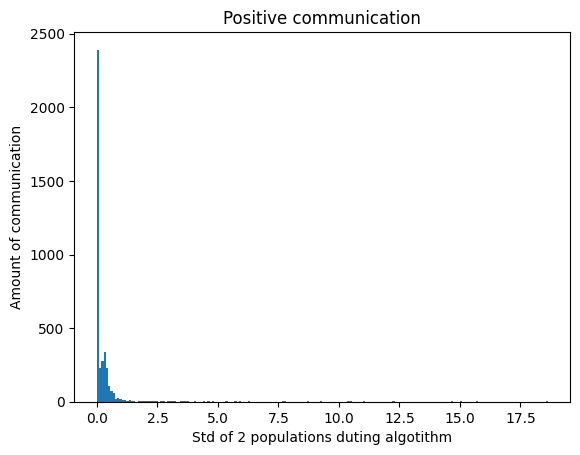

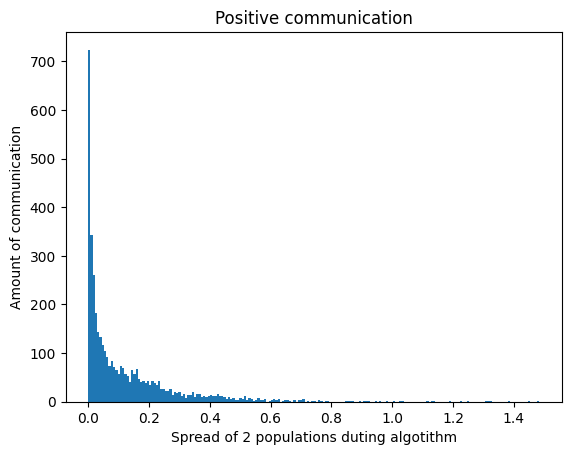

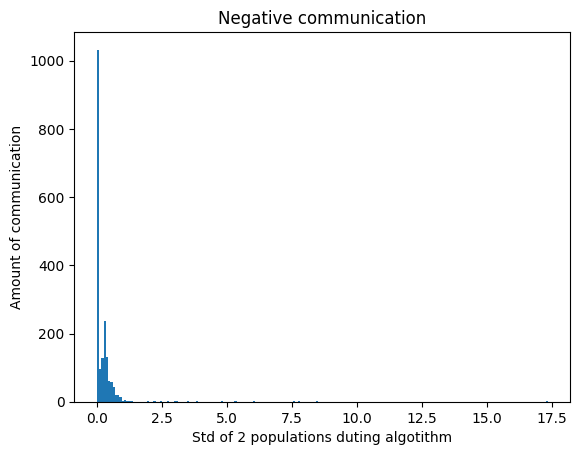

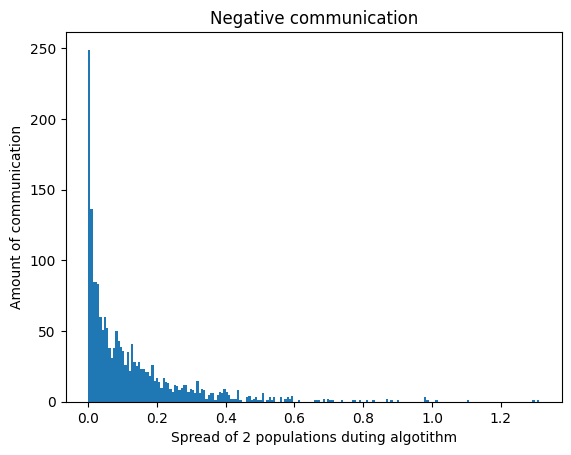

INFO:root:plotting finished in 0.0601921796798706
INFO:root:Run 0 out of 3
INFO:root:Socjo started
INFO:root:Socjo finished in 2.416653350989024
INFO:root:comparison finished in 2.217317505677541
INFO:root:best socjo 0.41562328437722984 best single 0.19977377645428307


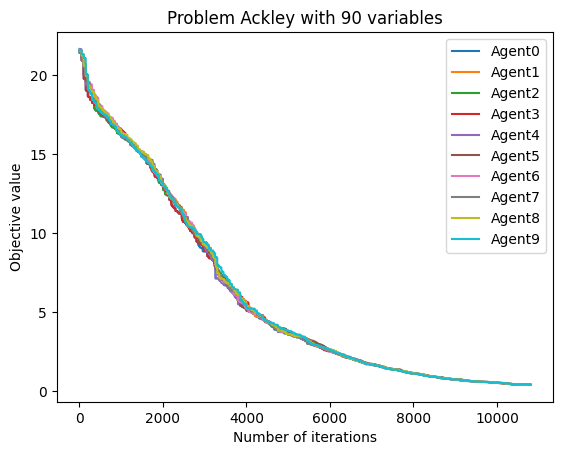

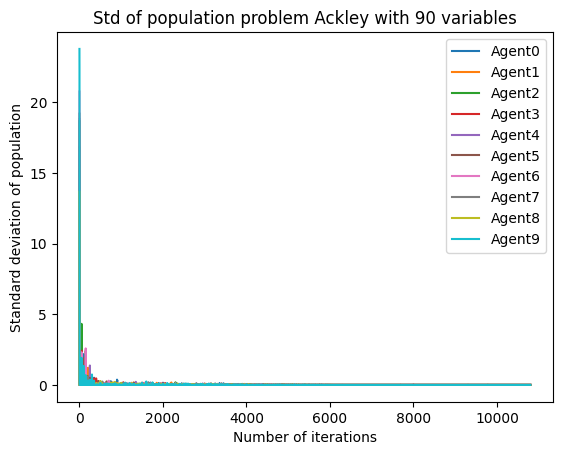

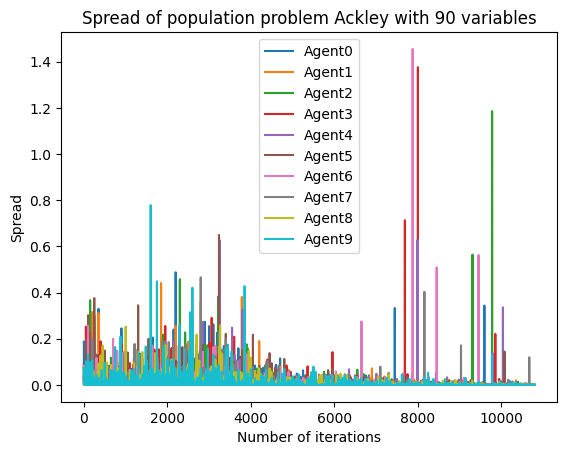

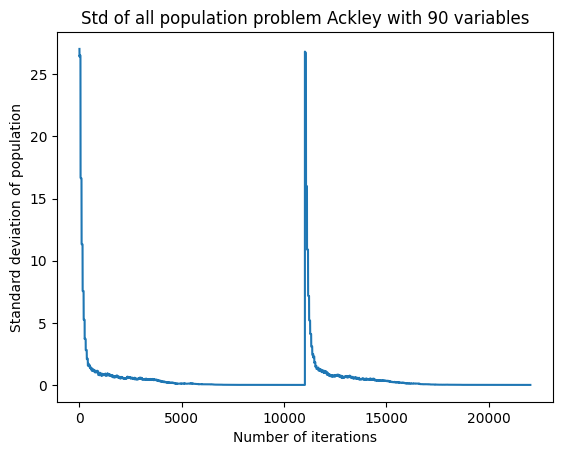

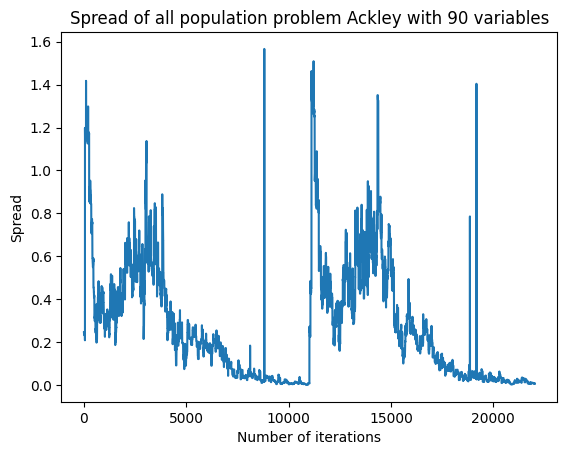

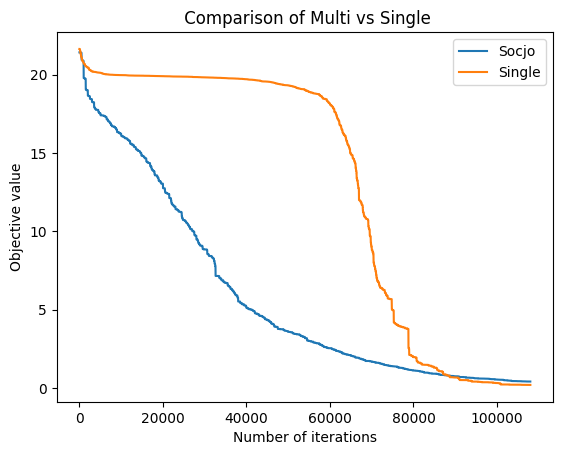

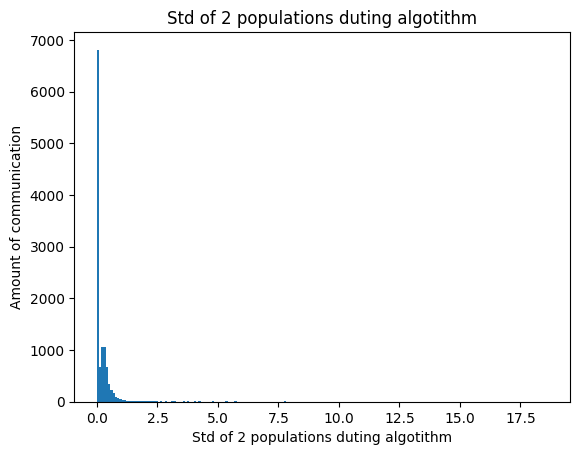

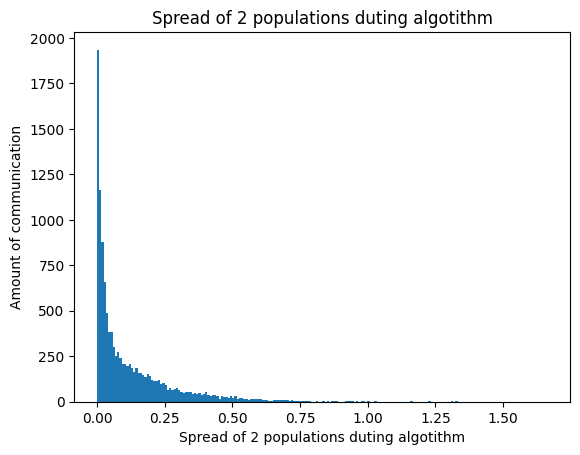

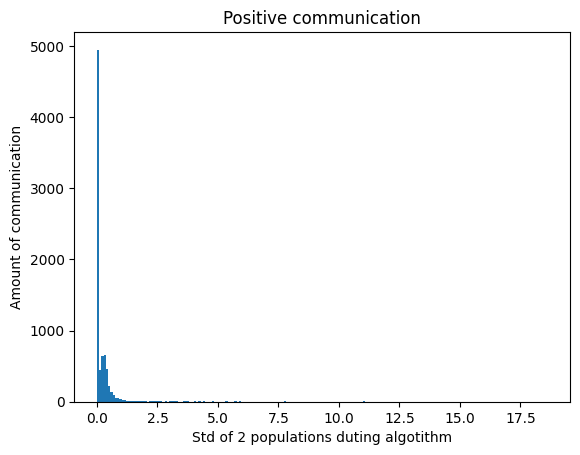

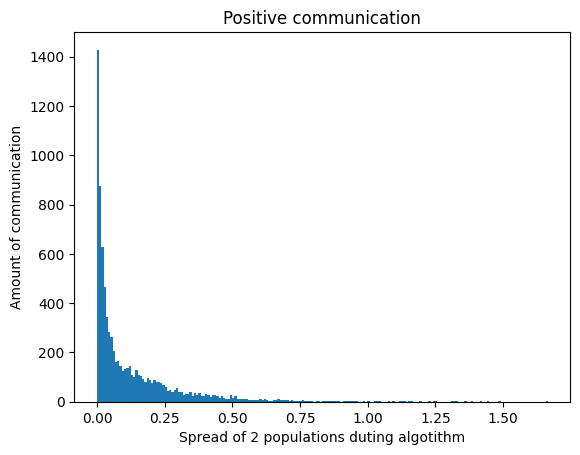

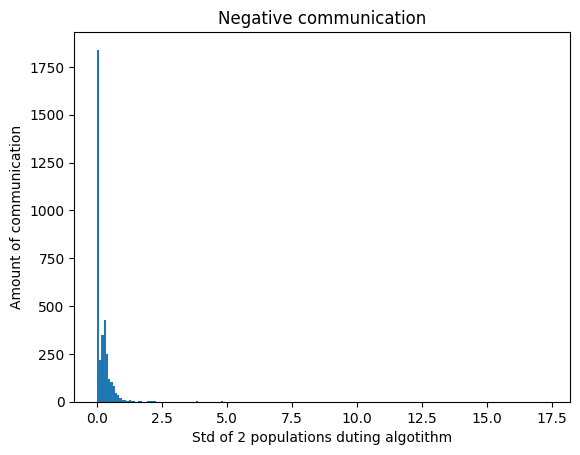

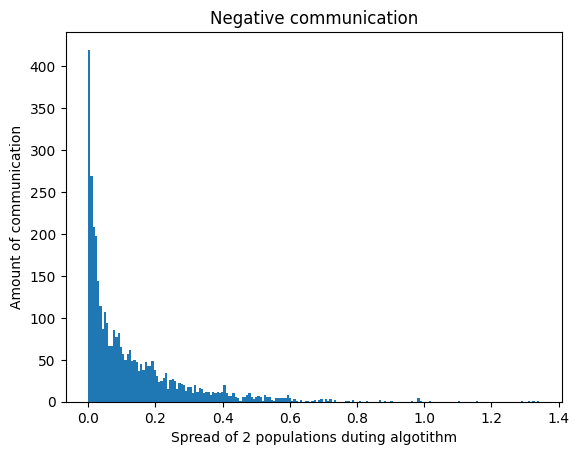

INFO:root:plotting finished in 0.06012748082478841
INFO:root:Run 1 out of 3
INFO:root:Socjo started
INFO:root:Socjo finished in 2.4276487787564593
INFO:root:comparison finished in 2.220671308040619
INFO:root:best socjo 0.43783937403516093 best single 0.945484969990773


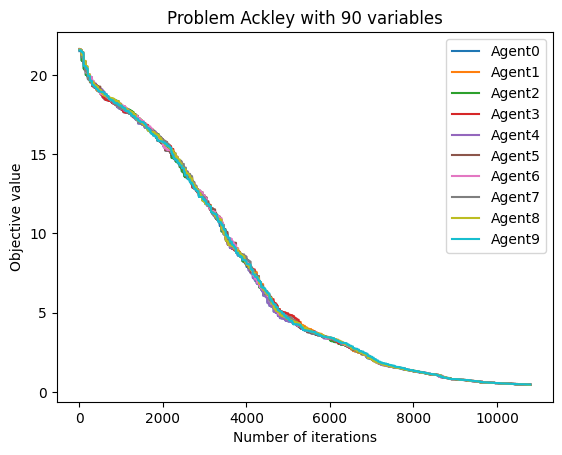

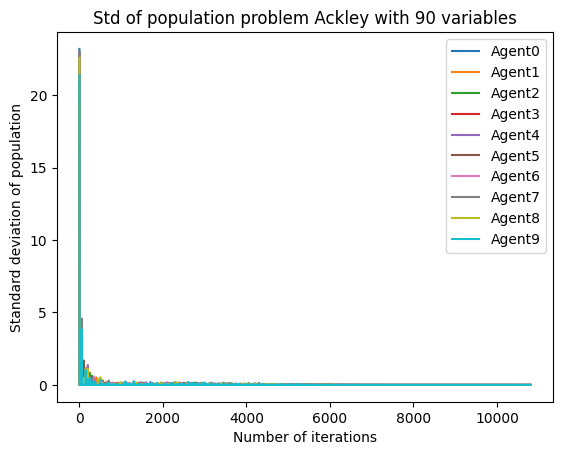

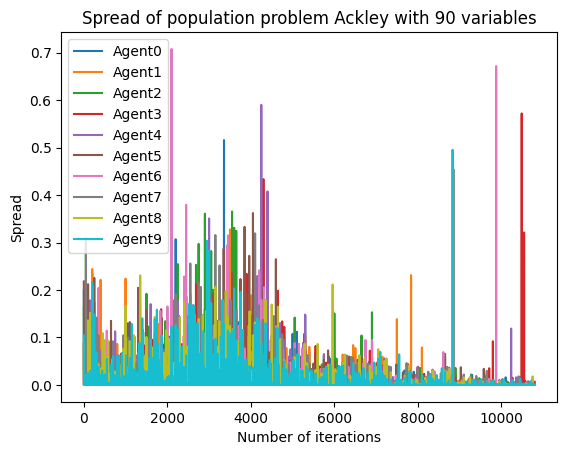

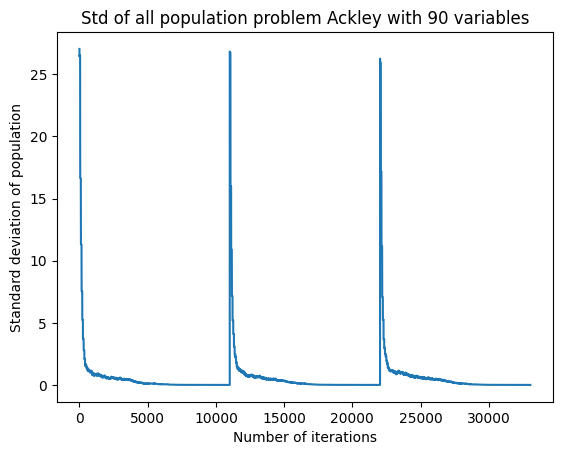

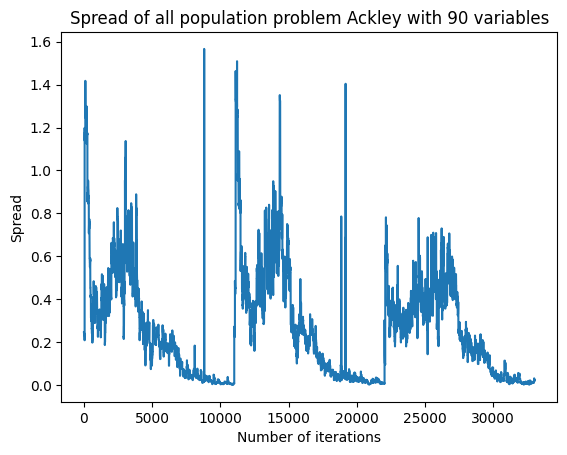

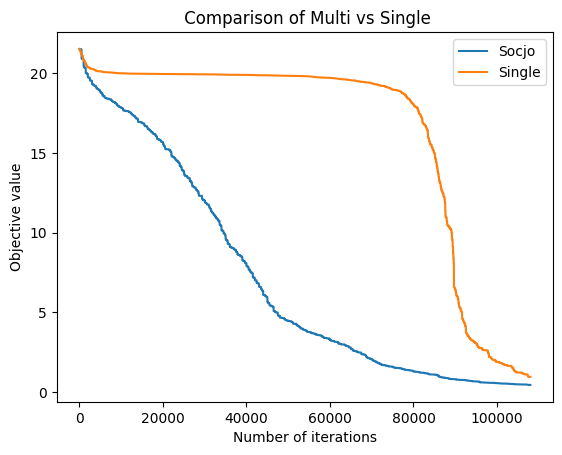

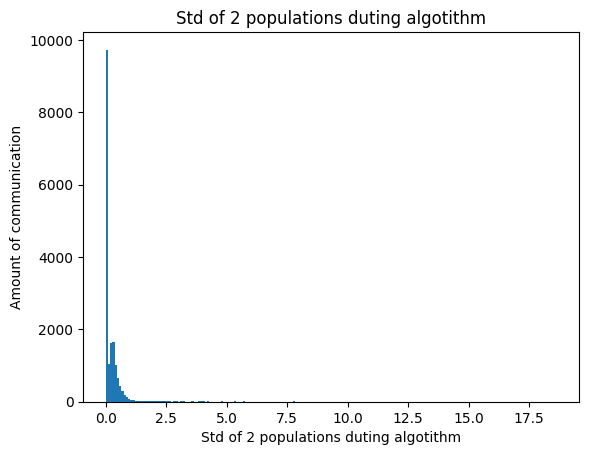

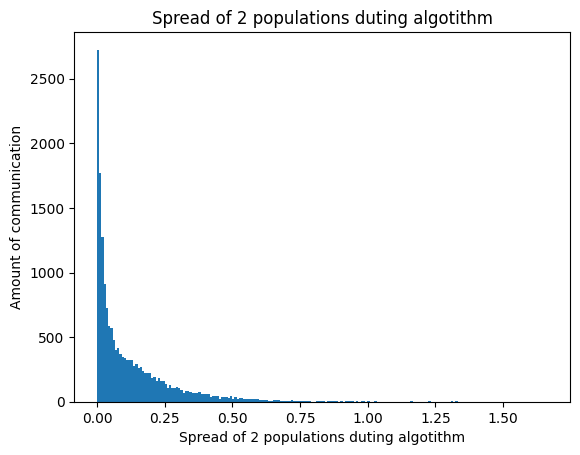

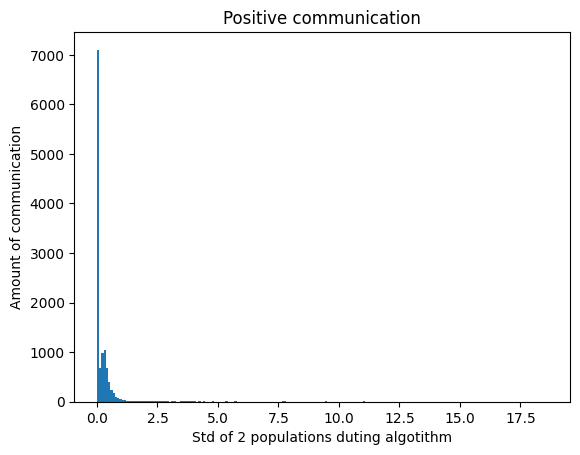

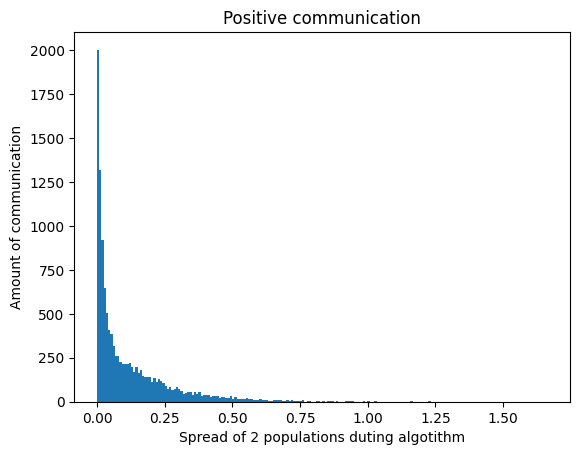

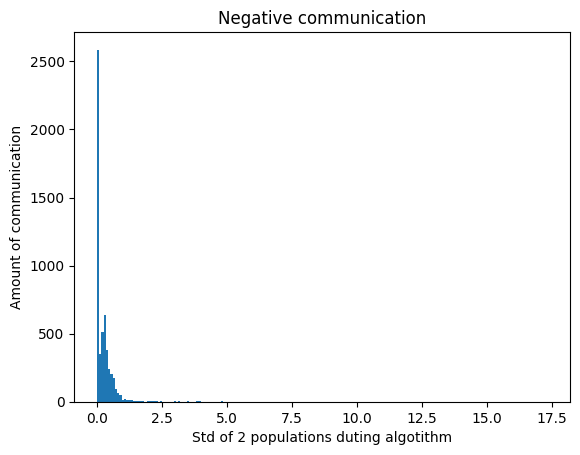

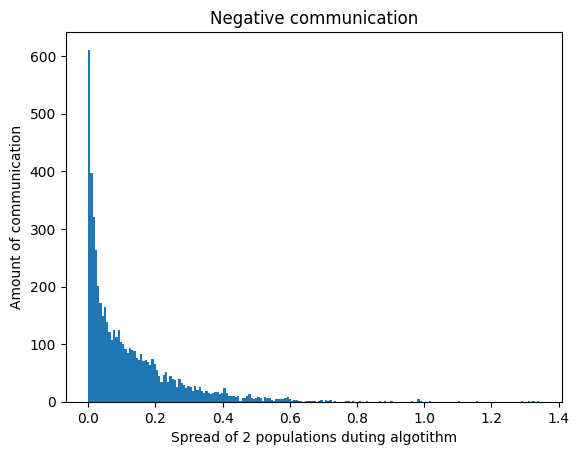

INFO:root:plotting finished in 0.06158740917841594
INFO:root:Run 2 out of 3


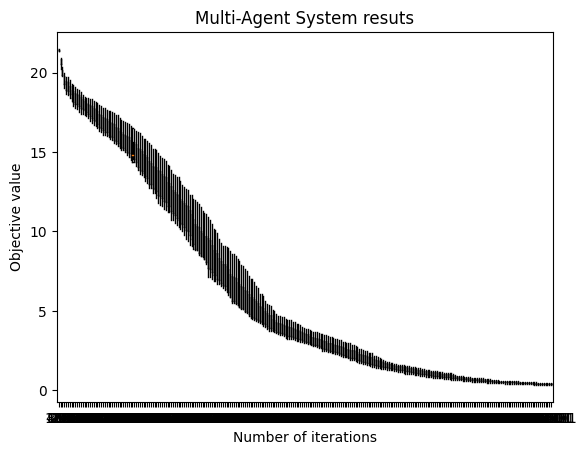

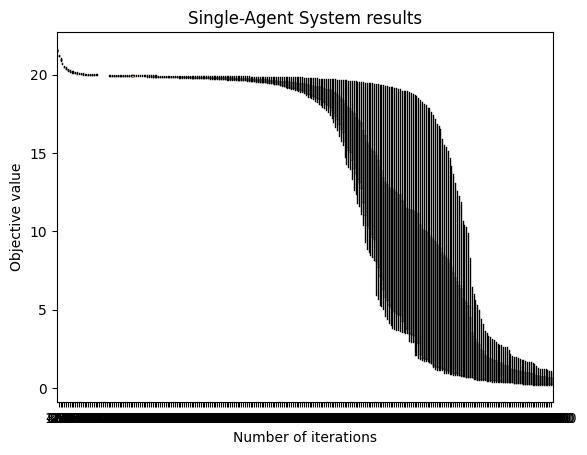

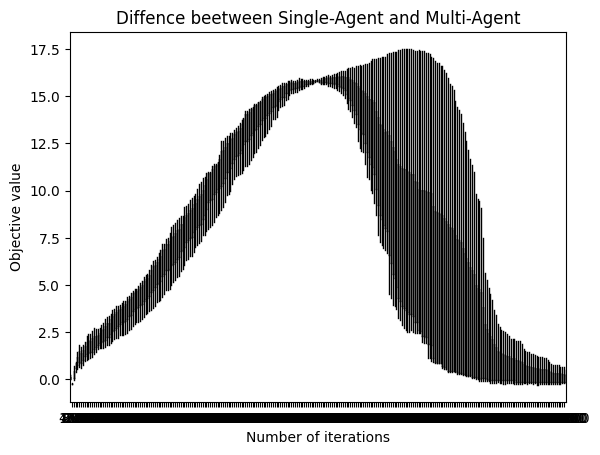

In [1]:
import logging

from inicialization.agents_inicialization import create_agents_float_solution
from settings import Settings
from runners.single import MultiAgentRunner
from runners.statistic import StatisticRunner
from time import time

time1 =  time()
Statistic_runner_list = []
for idx, config in enumerate(["config_R.json","config_G.json", "config_A.json"]):
    with open(config,"r") as f:
        settings = Settings(f)
        # logging.basicConfig(level=settings.log_level)
    logging.basicConfig(level=logging.INFO)
    logging.info(settings.json_settings)
    config = settings.decodeAgentsData()
    iterations = config.problem.number_of_variables * 300 * (8-(idx*2)) 
    Agents, Agent_Reference = create_agents_float_solution(config)     
    runner = MultiAgentRunner(agents= Agents, agent_single= Agent_Reference, max_iterations=iterations)
    Statistic_runner_list.append(StatisticRunner(runner))
    Statistic_runner_list[idx].run_an_collect_data(no_runs = 3, cycles=int(iterations/50/config.noAgents) , cycle_iter=50, num_of_comm=3
    )
    if settings.enable_plots:
        Statistic_runner_list[idx].plot()

In [2]:
for el in Statistic_runner_list:   
    for i in range (0, len(el.Executor.comunication_history)//1000):

        lista1 = list(filter(lambda hist: hist.result == True, el.Executor.comunication_history[i:i+1000]))
        lista2 = list(filter(lambda hist: hist.result == False, el.Executor.comunication_history[i:i+1000]))
        print(f"{i*1000} - {i+1000} nr komunikacji pozytywna {lista1.__len__()} negatyna {lista2.__len__()}")


0 - 1000 nr komunikacji pozytywna 316 negatyna 684
1000 - 1001 nr komunikacji pozytywna 315 negatyna 685
2000 - 1002 nr komunikacji pozytywna 314 negatyna 686
3000 - 1003 nr komunikacji pozytywna 313 negatyna 687
4000 - 1004 nr komunikacji pozytywna 313 negatyna 687
5000 - 1005 nr komunikacji pozytywna 312 negatyna 688
6000 - 1006 nr komunikacji pozytywna 311 negatyna 689
7000 - 1007 nr komunikacji pozytywna 310 negatyna 690
8000 - 1008 nr komunikacji pozytywna 309 negatyna 691
9000 - 1009 nr komunikacji pozytywna 308 negatyna 692
10000 - 1010 nr komunikacji pozytywna 307 negatyna 693
11000 - 1011 nr komunikacji pozytywna 306 negatyna 694
12000 - 1012 nr komunikacji pozytywna 305 negatyna 695
13000 - 1013 nr komunikacji pozytywna 305 negatyna 695
14000 - 1014 nr komunikacji pozytywna 304 negatyna 696
15000 - 1015 nr komunikacji pozytywna 304 negatyna 696
16000 - 1016 nr komunikacji pozytywna 303 negatyna 697
17000 - 1017 nr komunikacji pozytywna 302 negatyna 698
18000 - 1018 nr komunik